# DSN AI Bootcamp Qualification 2023 - Aremu Olusola Submission

## Problem Statement
Wazobia Real Estate Limited, a leading real estate company in Nigeria, seeks your expertise to tackle one of its crucial challenges. They are determined to provide accurate and competitive pricing for houses, but accurately predicting house prices in the current market has been a hurdle they aim to overcome. Should you accept it, your mission is to develop a powerful and accurate predictive model that can estimate house prices in Nigeria.

## Getting Environment Ready: Installing Dependecies & Importing Libraries

In [83]:
#!pip install xgboost

In [84]:
import pandas as pd                        #for data wrangling and preprocessing
import numpy as np                         #for statistical analysis
import matplotlib.pyplot as plt            #for visualisation
%matplotlib inline
import matplotlib as mpl
import seaborn as sns                      #visualisation
# plt.style.use('fivethirtyeight')
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

## Loading Dataset

In [85]:
train = pd.read_csv('Housing_dataset_train.csv')

In [86]:
test = pd.read_csv('Housing_dataset_test.csv')

In [87]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [88]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [89]:
train.shape

(14000, 7)

In [90]:
test.shape

(6000, 6)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [92]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [93]:
print('Train:', train.shape)
print('Test:', test.shape)

Train: (14000, 7)
Test: (6000, 6)


## Exploratory Data Analysis

In [94]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

This shows the minimum and maximum value for each feature. It also hows the mean and standard deviation for each of the features. 

In [95]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


This shows a countplot of the feature 'location' which are the states in Nigeria. 
The visualization shows that the number of states is balanced.

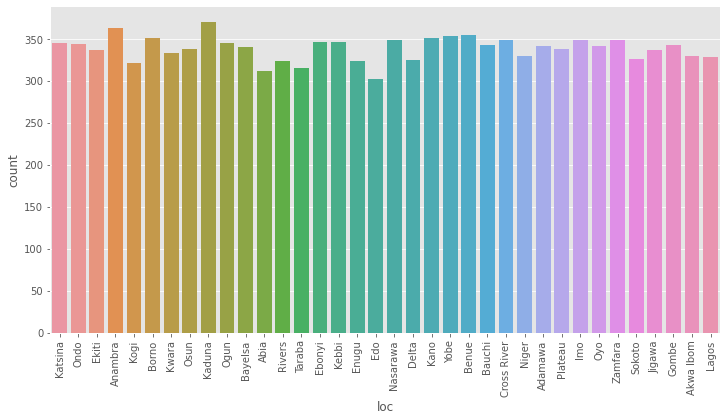

In [96]:
# Bar chart for the 'loc' column
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='loc')
plt.xticks(rotation=90)
plt.show()


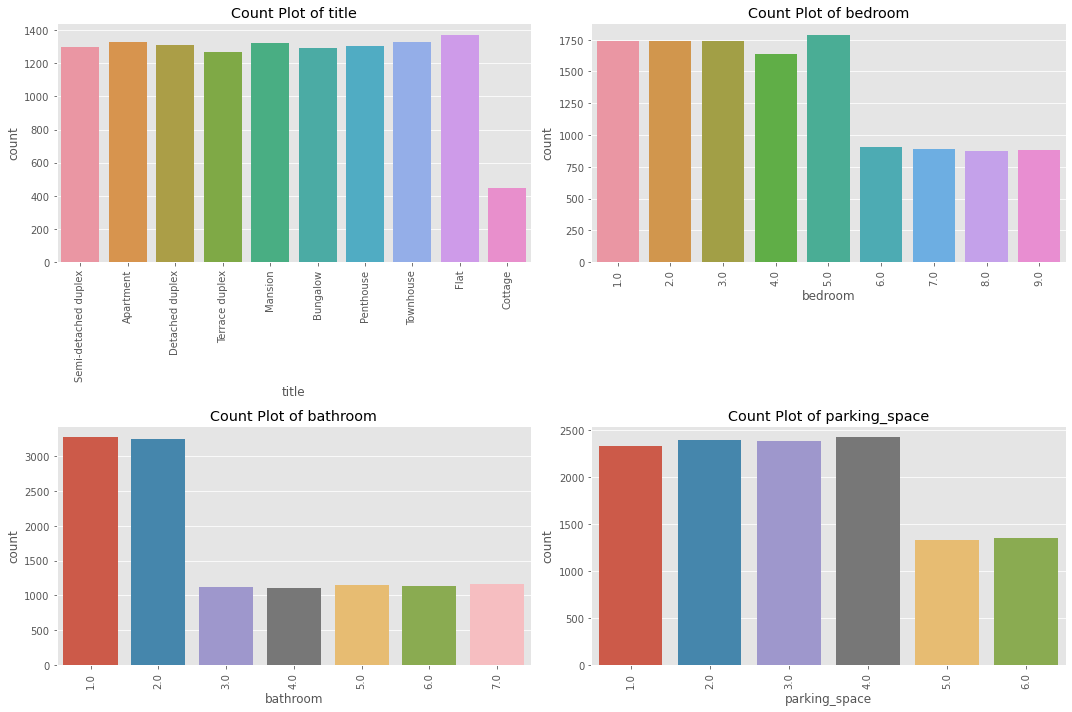

In [97]:
# Set up the subplot grid
columns = ['title', 'bedroom', 'bathroom', 'parking_space',]
num_plots = len(columns)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Loop through each categorical column and create count plots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(data=train, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'Count Plot of {column}')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)

# If there are unused subplots, remove them
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


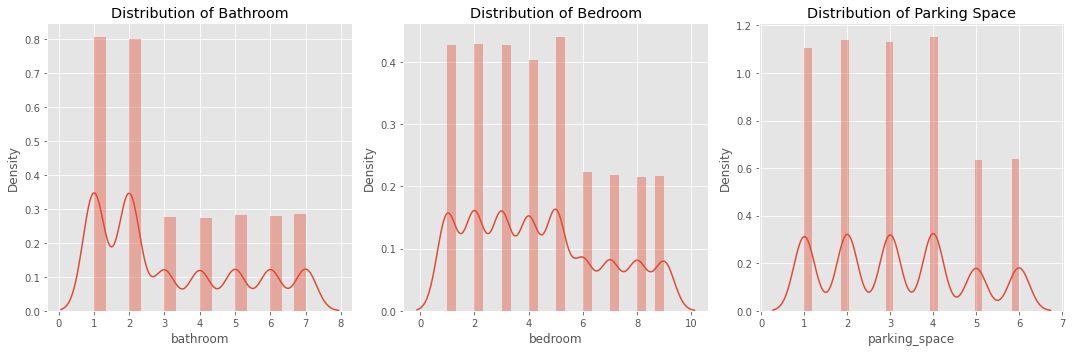

In [98]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Distplot for bathroom
sns.distplot(train['bathroom'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Bathroom')

# Distplot for bedroom
sns.distplot(train['bedroom'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Bedroom')

# Distplot for parking_space
sns.distplot(train['parking_space'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Parking Space')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


Text(0.5, 1.0, 'Distribution of Pricing')

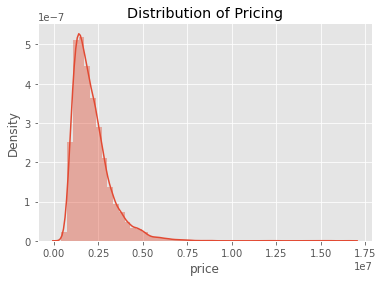

In [99]:
# Distplot for parking_space
sns.distplot(train['price'], kde=True)
plt.title('Distribution of Pricing')

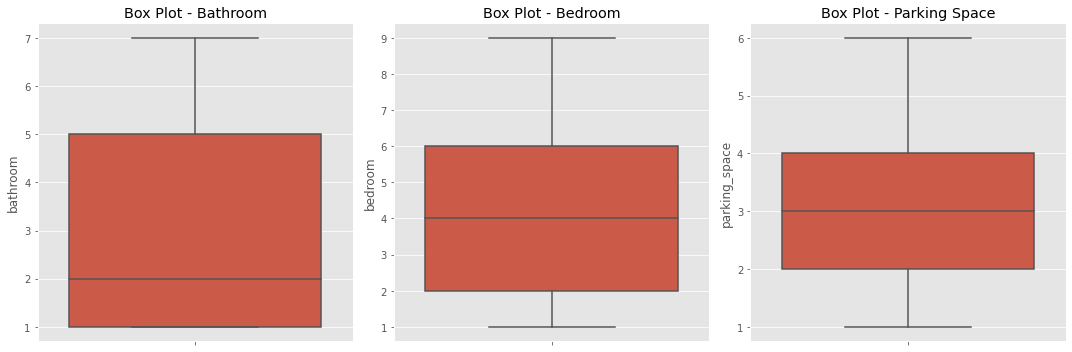

In [100]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Boxplot for bathroom
sns.boxplot(y='bathroom', data=train, ax=axes[0])
axes[0].set_title('Box Plot - Bathroom')

# Boxplot for bedroom
sns.boxplot(y='bedroom', data=train, ax=axes[1])
axes[1].set_title('Box Plot - Bedroom')

# Boxplot for parking_space
sns.boxplot(y='parking_space', data=train, ax=axes[2])
axes[2].set_title('Box Plot - Parking Space')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


Box plot for the continous data - bathrrom, bedroom and parking space shows there are no outliers.




Text(0.5, 1.0, 'Box Plot - Price')

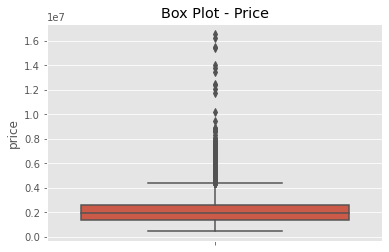

In [101]:
# Boxplot for parking_space
sns.boxplot(y='price', data=train)
plt.title('Box Plot - Price')

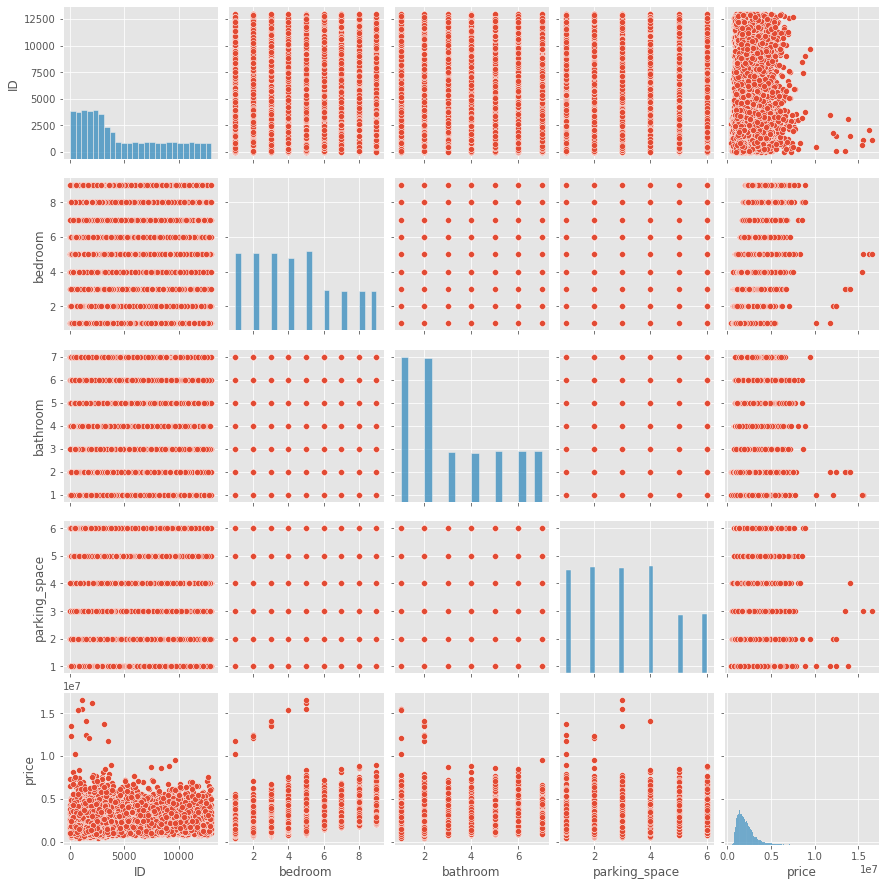

In [102]:
sns.pairplot(train)

Pairplot to show some relationships between the features. It didn't show any correlation or meaningful patttern.

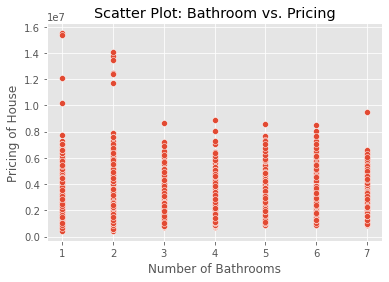

In [103]:
sns.scatterplot(train['bathroom'], train['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Pricing of House')
plt.title('Scatter Plot: Bathroom vs. Pricing')
plt.show()

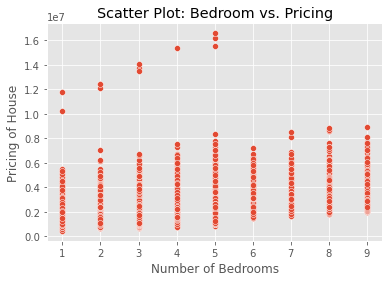

In [104]:
sns.scatterplot(train['bedroom'], train['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Pricing of House')
plt.title('Scatter Plot: Bedroom vs. Pricing')
plt.show()

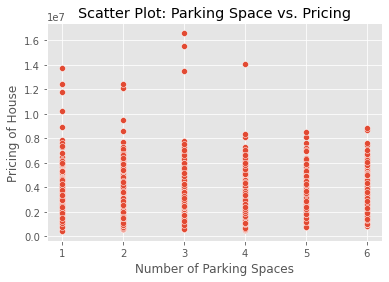

In [105]:
sns.scatterplot(train['parking_space'], train['price'])
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Pricing of House')
plt.title('Scatter Plot: Parking Space vs. Pricing')
plt.show()

The above is a scatter plot of bedroom, bathroom, parking_space against the target variable - pricing. They didn't also turn up a significant insight. However, it shows, there are some outliers in the pricing of the house which correlated strongly with lower amount of bathrooms, bedrooms and parking spaces.

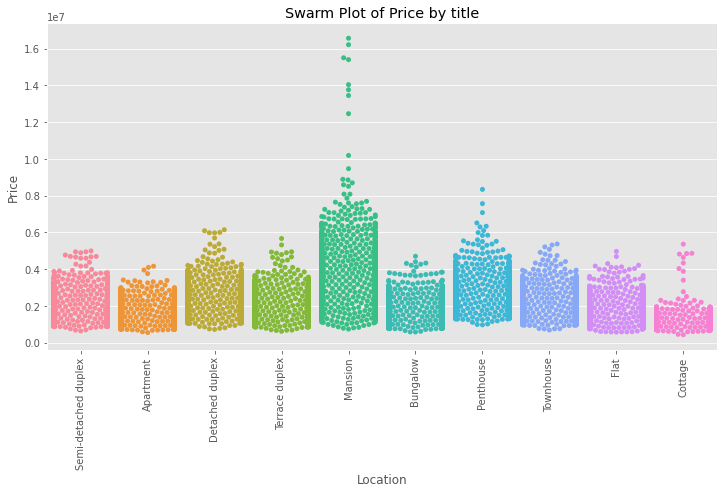

In [106]:
#Swarmplot of House price vs Title
plt.figure(figsize=(12, 6))
sns.swarmplot(x='title', y='price', data=train)
plt.xticks(rotation=90)
plt.title('Swarm Plot of Price by title')
plt.xlabel('Title')
plt.ylabel('Price')
plt.show()

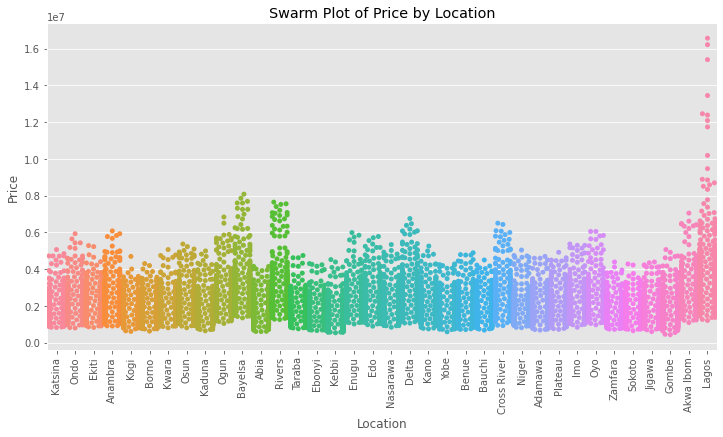

In [107]:
#Swarmplot of House price vs Title
plt.figure(figsize=(12, 6))
sns.swarmplot(x='loc', y='price', data=train)
plt.xticks(rotation=90)
plt.title('Swarm Plot of Price by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

In [25]:
corr = train.corr()
corr

,ID,bedroom,bathroom,parking_space,price
ID,1.000000,0.230474,0.345121,0.165160,0.167093
bedroom,0.230474,1.000000,0.227417,0.111095,0.529145
bathroom,0.345121,0.227417,1.000000,0.178497,0.221544
parking_space,0.165160,0.111095,0.178497,1.000000,0.109211
price,0.167093,0.529145,0.221544,0.109211,1.000000


<AxesSubplot:>

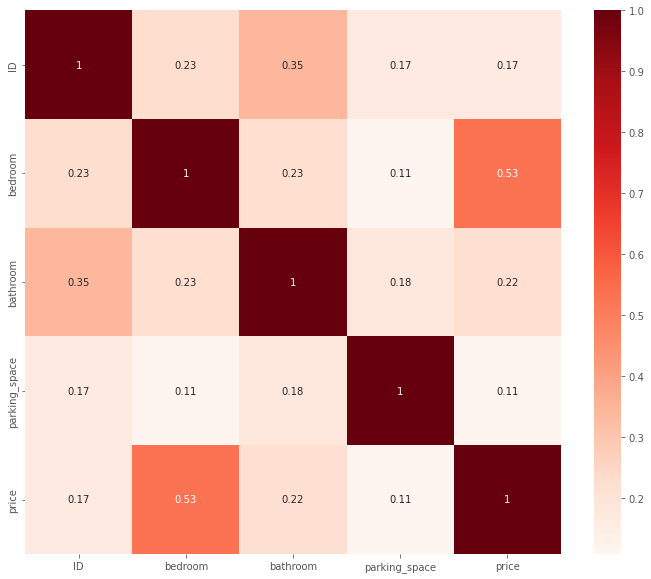

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

### Insights From EDA

#### 1. Kaduna appears most frequently in the "location" column, although the dataset shows a well-balanced distribution of states. 

    Explanation: The location column in the dataset contains the name of different states in Nigeria, and "Kaduna" is the state that appears most often. However, the dataset's overall distribution of states is well-balanced, indicating that each state has a reasonable representation.


#### 2. The distribution of house titles is also well-balanced, with "cottage" having the least appearance and "flat" having the highest appearance. 

    Explanation: The dataset includes various house titles, such as "cottage" and "flat," among others. Despite the variation in house titles, the distribution is balanced, with "cottage" being the least common and "flat" being the most common title.


#### 3. The majority of houses have bedrooms ranging from 1 to 5, while only a few have bedrooms ranging from 6 to 9. 

    Explanation: The dataset contains information about the number of bedrooms in different houses. Most houses have a bedroom count between 1 and 5, indicating that houses with this range of bedrooms are more prevalent. However, there are relatively few houses with a higher number of bedrooms, specifically between 6 and 9.


#### 4. Most houses have 1 to 2 bathrooms.

    Explanation: The dataset includes data on the number of bathrooms in various houses. The majority of houses have either 1 or 2 bathrooms, suggesting that these configurations are more common compared to houses with more bathrooms.


#### 5. The number of parking spaces mostly ranges from 1 to 4. 

    Explanation: The dataset contains information about the number of parking spaces available in different houses. The data shows that most houses have parking space numbers between 1 and 4, indicating that this range is more prevalent compared to houses with more parking spaces.


#### 6. The distribution of bathrooms, bedrooms, and parking spaces is skewed to the right. 

    Explanation: When a distribution is "skewed to the right," it means that the data is concentrated more towards the lower values, with a few extreme higher values. In this context, it suggests that there are relatively more houses with fewer bathrooms, bedrooms, and parking spaces, and only a small number of houses have an unusually high number of these features.


#### 7. Similarly, the distribution of the target variable, "pricing," is also skewed to the right. 

    Explanation: The target variable, "pricing," represents the house prices in the dataset. When the distribution is "skewed to the right," it means that most houses have lower prices, while a few houses have significantly higher prices.


#### 8. The box plots of bathrooms, bedrooms, and parking spaces show no outliers. 

    Explanation: Box plots are used to visualize the distribution and identify outliers in the data. In this case, the box plots for bathrooms, bedrooms, and parking spaces do not show any data points that are considered outliers, which means the data points are within a reasonable range.


#### 10. However, the box plot of price reveals the presence of some outliers. 

    Explanation: In contrast to the previous statement, the box plot for house prices ("price") displays some data points that fall outside the typical range, indicating the presence of outliers – houses with unusually high or low prices compared to the rest of the dataset.


#### 11. Plotting the continuous variables (bedrooms, bathrooms, and parking spaces) against pricing also shows some outliers in the prices, mostly towards the right (1-4). 

    Explanation: When visualizing the relationship between the continuous variables (bedrooms, bathrooms, parking spaces) and house prices ("pricing"), it becomes apparent that there are outliers in the prices. These outliers tend to be more common among houses with a lower number of bedrooms, bathrooms, and parking spaces.


#### 12. The bar plot comparing prices vs. location indicates that houses in Lagos are the most expensive, followed by Bayelsa, Rivers, and Delta. Conversely, house prices are the cheapest in Ebonyi and Kebbi. 

    Explanation: The bar plot comparing house prices to different locations (states) in Nigeria shows that houses in Lagos have the highest average prices, followed by Bayelsa, Rivers, and Delta. On the other hand, the average house prices in Ebonyi and Kebbi are the lowest among all the states.


#### 13. Mansions are the most expensive of all house titles, while cottages are the least expensive. 

    Explanation: Among the different house titles present in the dataset, "mansions" have the highest average prices, indicating that they are the most expensive type of houses. In contrast, "cottages" have the lowest average prices, making them the least expensive.


#### 14. Regarding price, mansions have the most outliers, with increasing prices. 

    Explanation: When examining the distribution of house prices based on house titles, "mansions" have the most outliers, which means there are several instances of mansions with unusually high prices compared to the majority of other houses. This indicates that there is a considerable variation in mansion prices, with some of them being significantly more expensive than others.


## Working on Null Values & Feature Engineering

In [27]:
y= train['price']
train = train.drop(columns=['price'])

In [28]:
#To ensure that both feature engineering and data wrangling is applied on both test and train data, I will combine both.
combined_df = pd.concat([train, test], axis=0, ignore_index=True)

In [29]:
combined_df

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0
1,2748,Ondo,Apartment,NaN,2.0,4.0
2,9261,Ekiti,NaN,7.0,5.0,NaN
3,2224,Anambra,Detached duplex,5.0,2.0,4.0
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0
...,...,...,...,...,...,...
19995,1594,Ekiti,Flat,4.0,5.0,2.0
19996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0
19997,10195,Oyo,Townhouse,4.0,1.0,4.0
19998,9455,Bauchi,Flat,3.0,7.0,5.0


In [30]:
#check the percentage of null in the datset
combined_df.isnull().mean().round(4) * 100

ID               0.00
loc              9.06
title            8.61
bedroom          9.00
bathroom         9.02
parking_space    9.06
dtype: float64

In [31]:
combined_df[combined_df['title'] == 'Penthouse'].head(50)

,ID,loc,title,bedroom,bathroom,parking_space
7,3003,Katsina,Penthouse,3.0,3.0,5.0
9,3085,Kaduna,Penthouse,NaN,3.0,3.0
29,2825,Kano,Penthouse,1.0,1.0,1.0
31,12131,Osun,Penthouse,6.0,NaN,2.0
48,446,Bayelsa,Penthouse,2.0,2.0,2.0
53,11897,NaN,Penthouse,2.0,5.0,3.0
66,699,NaN,Penthouse,5.0,2.0,2.0
78,1917,Ondo,Penthouse,3.0,1.0,NaN
99,3929,NaN,Penthouse,8.0,5.0,3.0
113,12399,Niger,Penthouse,3.0,1.0,NaN


In [32]:
#trying to check if there a correlation in there bedroom and bathroom of a particular title - penthouse
penthouse = combined_df[combined_df['title'] == 'Penthouse']

In [33]:
penthouse[penthouse['bedroom'] == 1.0]

,ID,loc,title,bedroom,bathroom,parking_space
29,2825,Kano,Penthouse,1.0,1.0,1.0
153,1963,Anambra,Penthouse,1.0,NaN,4.0
159,1529,Bayelsa,Penthouse,1.0,4.0,1.0
187,1706,NaN,Penthouse,1.0,1.0,1.0
240,7087,Nasarawa,Penthouse,1.0,NaN,4.0
...,...,...,...,...,...,...
19600,12425,Osun,Penthouse,1.0,4.0,4.0
19616,2860,Nasarawa,Penthouse,1.0,2.0,2.0
19667,1767,Zamfara,Penthouse,1.0,2.0,2.0
19770,2971,Sokoto,Penthouse,1.0,2.0,4.0


In [34]:
#the above shows that for penhouse, the number of bedroom does not equal the number of bathroom in all cases.

In [35]:
penthouse[penthouse['bedroom'] == 1.0].bathroom.value_counts()
#I will go with using median to fill in missing bathroom where the number of room is == 1

1.0    81
2.0    64
4.0    21
6.0    20
5.0    19
3.0    12
7.0     7
Name: bathroom, dtype: int64

In [36]:
combined_df[combined_df['bedroom'] == 1.0].bathroom.value_counts()

1.0    771
2.0    707
7.0    178
5.0    174
6.0    170
3.0    166
4.0    152
Name: bathroom, dtype: int64

<AxesSubplot:xlabel='bathroom', ylabel='Density'>

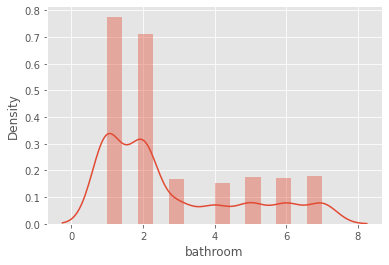

In [37]:
sns.distplot(combined_df[combined_df['bedroom'] == 1.0].bathroom)

In [38]:
combined_df[combined_df['bedroom'] == 1.0].bathroom.median()
#Same as above as it still align with the above insight.

2.0

<AxesSubplot:xlabel='bathroom', ylabel='Density'>

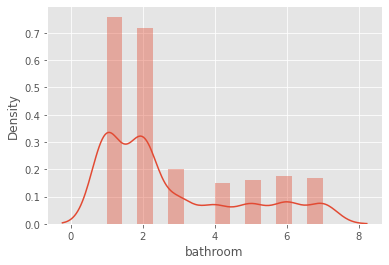

In [39]:
#checking if the distribution is same for bedroom == 2
sns.distplot(combined_df[combined_df['bedroom'] == 2.0].bathroom)

<AxesSubplot:xlabel='bathroom', ylabel='Density'>

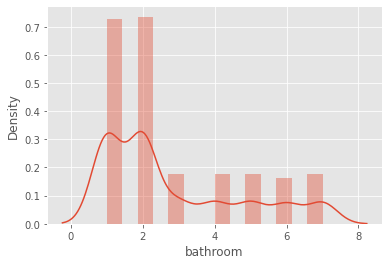

In [40]:
#checking if the distribution is same for bedroom == 3
sns.distplot(combined_df[combined_df['bedroom'] == 3.0].bathroom)
#the distribution follows a pattern, we can apply the same technique as above.

In [41]:
#Parking space can be unavailable in some buildings so it may be a proper representation of the data. Lets replace that with -999
combined_df['parking_space'].fillna(-999, inplace=True)

In [42]:
combined_df.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space       0
dtype: int64

In [43]:
#for bedroom, the type of building may have a correlation with the number of bedroom, but its difficult because the title of building is a categorical data
#what if I see how the distribution goes based on the title of building
unique_counts = combined_df['title'].value_counts()
print(unique_counts)

Flat                    2026
Mansion                 1995
Townhouse               1980
Apartment               1973
Semi-detached duplex    1939
Detached duplex         1938
Penthouse               1935
Bungalow                1934
Terrace duplex          1893
Cottage                  665
Name: title, dtype: int64


In [44]:
train

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0
1,2748,Ondo,Apartment,NaN,2.0,4.0
2,9261,Ekiti,NaN,7.0,5.0,NaN
3,2224,Anambra,Detached duplex,5.0,2.0,4.0
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0
...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN
13996,9704,Kaduna,Apartment,NaN,7.0,5.0
13997,11190,Plateau,Bungalow,8.0,6.0,5.0
13998,9256,Delta,Flat,NaN,6.0,1.0


In [45]:
combined_df[combined_df['title']=='Flat']

,ID,loc,title,bedroom,bathroom,parking_space
20,11939,Kaduna,Flat,NaN,7.0,2.0
24,10758,Edo,Flat,6.0,7.0,6.0
28,1787,Kwara,Flat,5.0,2.0,1.0
42,2996,Ebonyi,Flat,4.0,2.0,1.0
46,814,NaN,Flat,2.0,1.0,2.0
...,...,...,...,...,...,...
19971,8366,Oyo,Flat,9.0,5.0,2.0
19974,3152,Kaduna,Flat,3.0,2.0,1.0
19993,1974,Anambra,Flat,1.0,7.0,1.0
19995,1594,Ekiti,Flat,4.0,5.0,2.0


<AxesSubplot:xlabel='bedroom', ylabel='Density'>

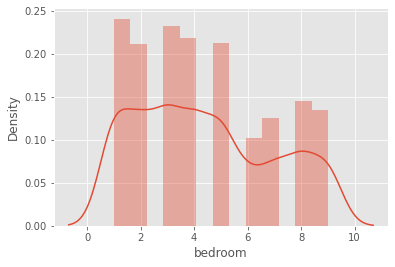

In [46]:
sns.distplot(combined_df[combined_df['title']=='Flat'].bedroom)

In [47]:
#fill the Nan in title as a new category
combined_df['title'].fillna('New', inplace=True)

In [48]:
#fill the Nan in loc as a new category
combined_df['loc'].fillna('State', inplace=True)

In [49]:
combined_df[combined_df['title']=='Flat'].bedroom.median()
#we will fill each of them with the median, but before that, lets check for another apartment.

4.0

<AxesSubplot:xlabel='bedroom', ylabel='Density'>

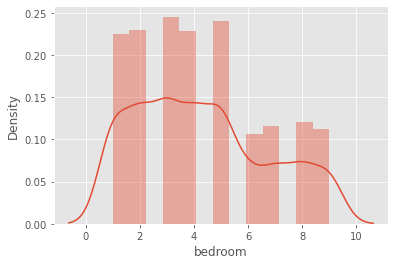

In [50]:
sns.distplot(combined_df[combined_df['title']=='Apartment'].bedroom)

In [51]:
#lets automate
# i filled nan with the median number of badroom for a given title of  building
unique_title = combined_df['title'].value_counts().index
for i in unique_title:
    median_value_bedroom_for_title = combined_df[combined_df['title']== i].bedroom.median()

    # Fill NaN values with the median when 'condition_column' == i
    combined_df.loc[combined_df['title'] == i, 'bedroom'] = combined_df.loc[combined_df['title'] == i, 'bedroom'].fillna(median_value_bedroom_for_title)

In [52]:
#lets automate
# i filled nan with the median number of bathroom for a given number of bedroom
max_bedroom = combined_df.bedroom.max()
for i in range(1, int(max_bedroom+1)):
    median_value_bathroom_for_bedroom = combined_df[combined_df['bedroom'] == i].bathroom.median()

    # Fill NaN values with the median when 'condition_column' == 1
    combined_df.loc[combined_df['bedroom'] == i, 'bathroom'] = combined_df.loc[combined_df['bedroom'] == i, 'bathroom'].fillna(median_value_bathroom_for_bedroom)

In [53]:
combined_df.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [54]:
train

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0
1,2748,Ondo,Apartment,NaN,2.0,4.0
2,9261,Ekiti,NaN,7.0,5.0,NaN
3,2224,Anambra,Detached duplex,5.0,2.0,4.0
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0
...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN
13996,9704,Kaduna,Apartment,NaN,7.0,5.0
13997,11190,Plateau,Bungalow,8.0,6.0,5.0
13998,9256,Delta,Flat,NaN,6.0,1.0


In [55]:
combined_df.corr()

,ID,bedroom,bathroom,parking_space
ID,1.000000,0.218135,0.330879,-0.003373
bedroom,0.218135,1.000000,0.246585,0.004737
bathroom,0.330879,0.246585,1.000000,0.001038
parking_space,-0.003373,0.004737,0.001038,1.000000


In [56]:
combined_df['title'].value_counts()

Flat                    2026
Mansion                 1995
Townhouse               1980
Apartment               1973
Semi-detached duplex    1939
Detached duplex         1938
Penthouse               1935
Bungalow                1934
Terrace duplex          1893
New                     1722
Cottage                  665
Name: title, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Semi-detached duplex'),
  Text(1, 0, 'Apartment'),
  Text(2, 0, 'New'),
  Text(3, 0, 'Detached duplex'),
  Text(4, 0, 'Terrace duplex'),
  Text(5, 0, 'Mansion'),
  Text(6, 0, 'Bungalow'),
  Text(7, 0, 'Penthouse'),
  Text(8, 0, 'Townhouse'),
  Text(9, 0, 'Flat'),
  Text(10, 0, 'Cottage')])

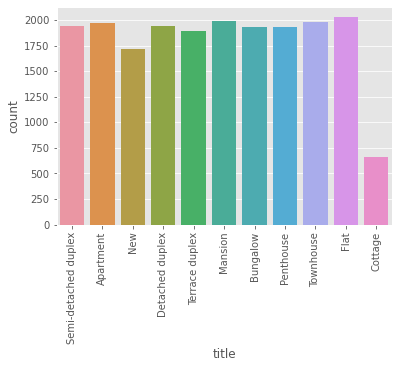

In [57]:
sns.countplot(combined_df.title)
plt.xticks(rotation=90)

In [58]:
test.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [59]:
# Perform one-hot encoding
combined_df_encoded = pd.get_dummies(combined_df, columns=['loc', 'title'])

In [60]:
X = combined_df_encoded.drop(columns=['ID'])

In [61]:
X['total_rooms'] = X['bedroom'] +X['bathroom']
X['bath/bed'] = X['bathroom'] /X['bedroom']

## Model Building

In [62]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt


In [63]:
X

,bedroom,bathroom,parking_space,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,...,title_Detached duplex,title_Flat,title_Mansion,title_New,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse,total_rooms,bath/bed
0,2.0,2.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.0,1.000000
1,4.0,2.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.0,0.500000
2,7.0,5.0,-999.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,12.0,0.714286
3,5.0,2.0,4.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,7.0,0.400000
4,4.0,5.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9.0,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.0,5.0,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,9.0,1.250000
19996,5.0,7.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,12.0,1.400000
19997,4.0,1.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5.0,0.250000
19998,3.0,7.0,5.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,10.0,2.333333


In [64]:
X_train_data = X[0:14000]

In [65]:
X_train_data

,bedroom,bathroom,parking_space,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,...,title_Detached duplex,title_Flat,title_Mansion,title_New,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse,total_rooms,bath/bed
0,2.0,2.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.0,1.000000
1,4.0,2.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.0,0.500000
2,7.0,5.0,-999.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,12.0,0.714286
3,5.0,2.0,4.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,7.0,0.400000
4,4.0,5.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9.0,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,4.0,7.0,-999.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11.0,1.750000
13996,4.0,7.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11.0,1.750000
13997,8.0,6.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14.0,0.750000
13998,4.0,6.0,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,10.0,1.500000


In [66]:
x_test_data = X[14000:]

In [67]:
x_test_data

,bedroom,bathroom,parking_space,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,...,title_Detached duplex,title_Flat,title_Mansion,title_New,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse,total_rooms,bath/bed
14000,4.0,1.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,5.0,0.250000
14001,2.0,2.0,4.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,1.000000
14002,2.0,7.0,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9.0,3.500000
14003,9.0,5.0,2.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,14.0,0.555556
14004,5.0,6.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,11.0,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.0,5.0,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,9.0,1.250000
19996,5.0,7.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,12.0,1.400000
19997,4.0,1.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5.0,0.250000
19998,3.0,7.0,5.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,10.0,2.333333


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y, test_size=0.2, random_state=42)


In [64]:
# from catboost import CatBoostRegressor
# from sklearn.model_selection import GridSearchCV

# # Create a CatBoostRegressor object
# catboost_model = CatBoostRegressor(verbose=10000)

# # Define the hyperparameter grid to search
# param_grid = {
#     'iterations': [40000],           # Number of boosting iterations
#     'learning_rate': [0.001],      # Learning rate for boosting
#     'depth': [4, 6, 8],                      # Depth of the trees
#     'l2_leaf_reg': [1, 3, 5]                 # L2 regularization term on leaf weights
# }

# # Initialize the GridSearchCV object with the CatBoost model and hyperparameter grid
# grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error')

# # Perform the grid search on training data
# grid_search.fit(X_train_data, y)

# # Print the best hyperparameters and corresponding RMSE
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best RMSE:", np.sqrt(-grid_search.best_score_))


In [ ]:
# Best Hyperparameters: {'iterations': 40000, 'learning_rate': 0.001}
# Best RMSE: 539618.7316709991

# Best Hyperparameters: {'depth': 4, 'iterations': 40000, 'l2_leaf_reg': 1, 'learning_rate': 0.001}
# Best RMSE: 537621.8812450934

In [69]:
# Initialize the CatBoostRegressor
model = CatBoostRegressor(loss_function='RMSE', 
                          iterations=40000, 
                          learning_rate=0.001,
                          depth=4,
                          l2_leaf_reg=1, 
                          random_state=42)


In [70]:
# Fit the model on the training data
model.fit(X_train, y_train, verbose=10000)

0:	learn: 1072692.2435386	total: 169ms	remaining: 1h 52m 20s
10000:	learn: 537271.2218478	total: 23.9s	remaining: 1m 11s
20000:	learn: 507522.4098642	total: 49.8s	remaining: 49.8s
30000:	learn: 493494.7101779	total: 1m 16s	remaining: 25.5s
39999:	learn: 482429.6478727	total: 1m 42s	remaining: 0us


In [71]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 584613.916695594


In [72]:
# Make predictions on the test data
catboost_pred = model.predict(x_test_data)

In [76]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV

# X_train, X_test, y_train, y_test = train_test_split(X_train_data, y, test_size=0.2, random_state=42)

# # Define the XGBoost regressor
# xgb_regressor = xgb.XGBRegressor()

# # Define the hyperparameters and their possible values for tuning
# param_grid = {
#     'max_depth': [3, 6],
#     'min_child_weight': [5],
#     'learning_rate': [0.2],
#     'n_estimators': [500],
#     'gamma': [0, 0.1, 0.2]
# #     'subsample': [0.9],
# #     'colsample_bytree': [0.7],
# #     'alpha': [0, 0.1, 0.5],
# #     'lambda': [0, 0.1, 0.5]
# }

# # Use GridSearchCV for hyperparameter tuning with evaluation based on RMSE
# grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred = best_model.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Best hyperparameters: {best_params}")
# print(f"Root Mean Squared Error on test set: {rmse}")


In [73]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create an XGBoost DMatrix for efficient data handling
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression problem using squared loss
    'eval_metric': 'rmse',            # Evaluation metric: Root Mean Squared Error
    'eta': 0.2,                       # Learning rate (step size for each iteration) 0.01
    'max_depth': 3,                   # Maximum depth of each tree
    'min_child_weight': 5,            # Minimum sum of instance weight (Hessian) needed in a child
    'gamma': 0,                       # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': 1.0,                 # Subsample ratio of the training instances
    'colsample_bytree': 0.7,          # Subsample ratio of features when constructing each tree
    'seed': 42                        # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 500  # Number of boosting rounds (iterations)
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Calculate and print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 580605.7881555016


In [74]:
x_test_data

,bedroom,bathroom,parking_space,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,...,title_Detached duplex,title_Flat,title_Mansion,title_New,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse,total_rooms,bath/bed
14000,4.0,1.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,5.0,0.250000
14001,2.0,2.0,4.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,1.000000
14002,2.0,7.0,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9.0,3.500000
14003,9.0,5.0,2.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,14.0,0.555556
14004,5.0,6.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,11.0,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.0,5.0,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,9.0,1.250000
19996,5.0,7.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,12.0,1.400000
19997,4.0,1.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5.0,0.250000
19998,3.0,7.0,5.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,10.0,2.333333


In [75]:
x_test_data = xgb.DMatrix(x_test_data)

In [77]:
# Make predictions on the test data
xgb_pred = model.predict(x_test_data)

In [78]:
n_test = pd.read_csv('Housing_dataset_test.csv')

In [79]:
submission = pd.DataFrame()
submission['ID'] = n_test['ID']
submission['price'] = (catboost_pred*3/5) + (xgb_pred*2/5) #blending the two models and giving catboost more weight

In [80]:
submission.to_csv('final_pred.csv', index=False)